<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd              
import seaborn as sns            
import os, warnings

import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

%pylab inline

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=3)
os.chdir("../../donnees")

warnings.filterwarnings(action="ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [10]:
donnees=pd.read_csv('Iris.csv',usecols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])
donnees.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


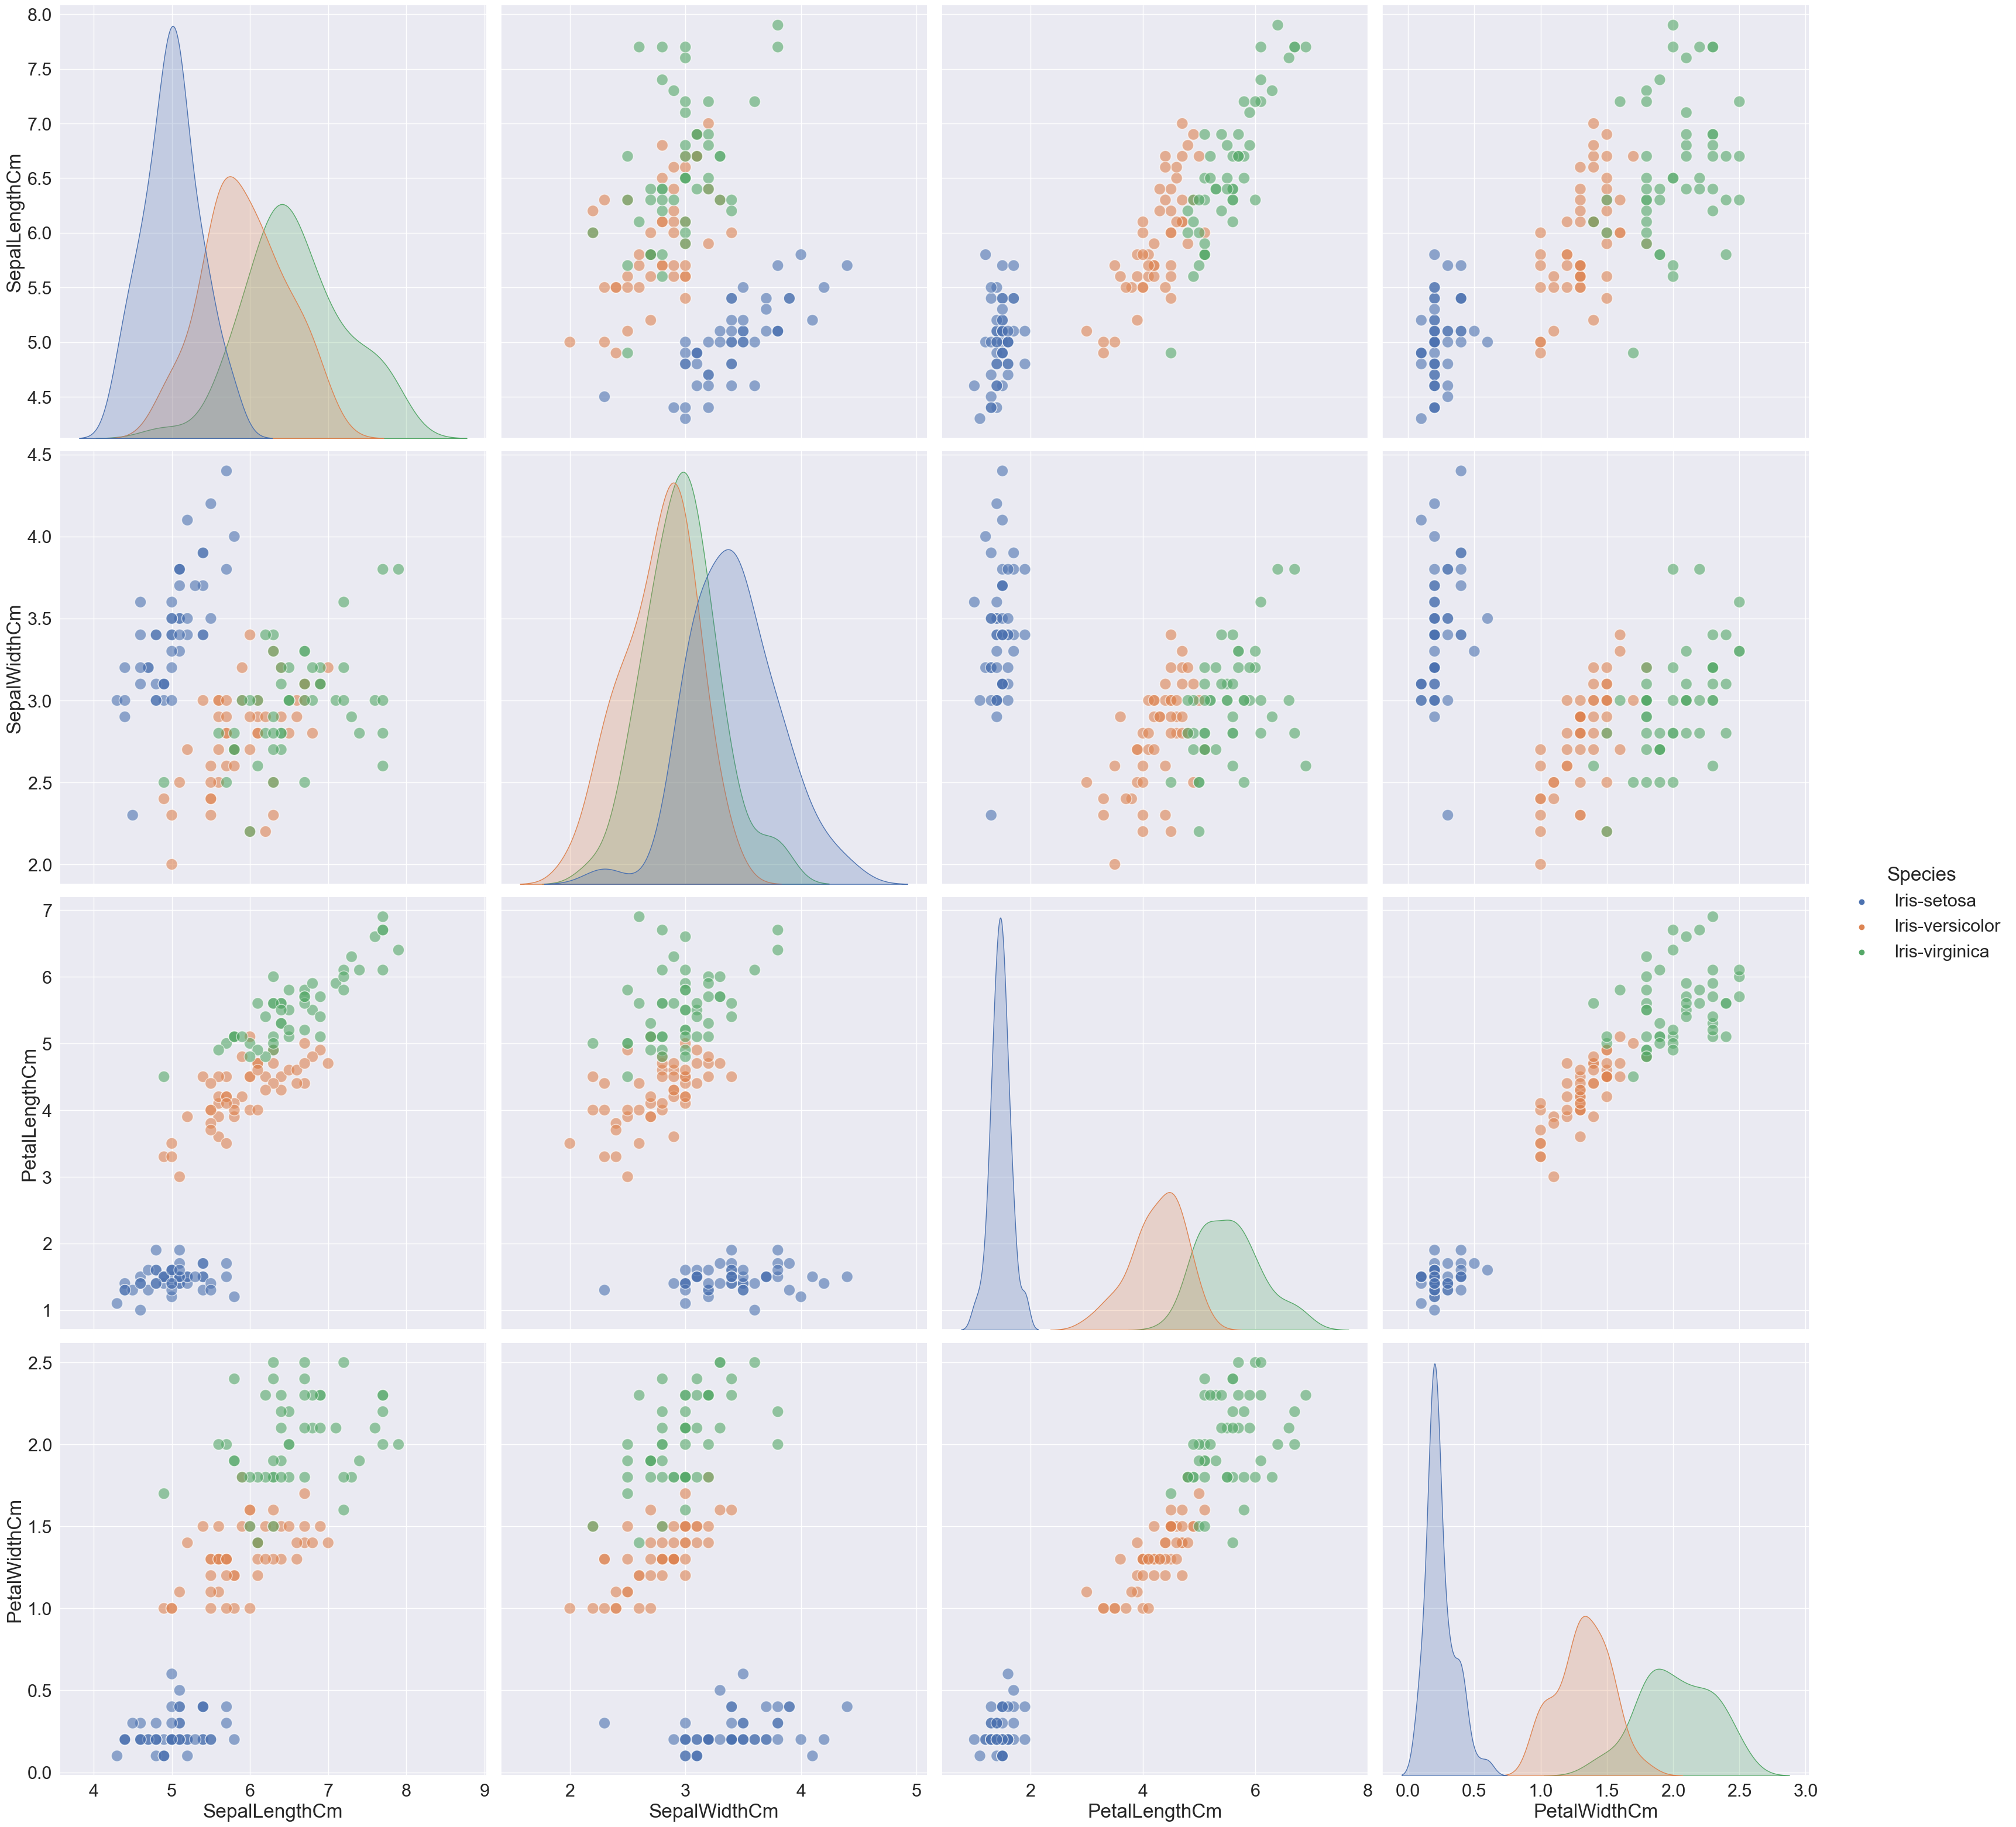

In [21]:
sns.pairplot(donnees, hue='Species', size=8, plot_kws={"s": 200,"alpha":0.6});

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(donnees.drop(columns='Species'), metric='euclidean', method='ward')

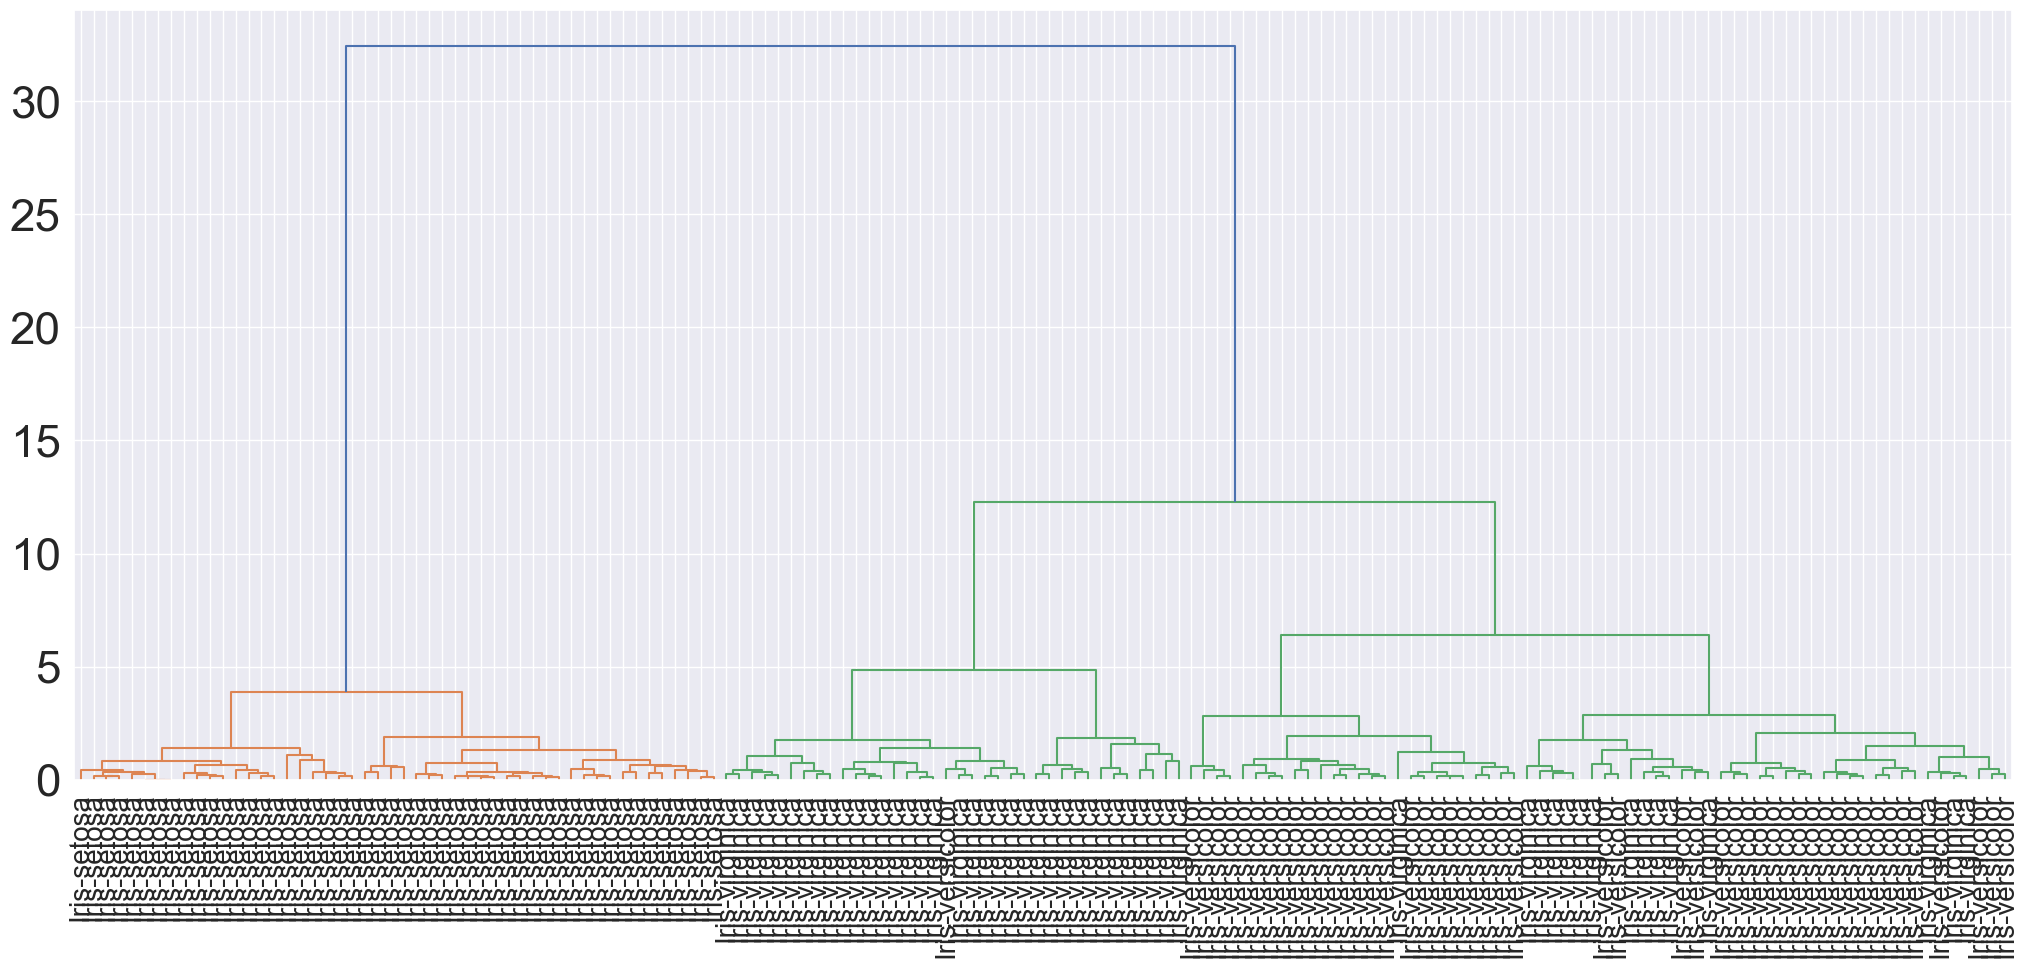

In [14]:
plt.figure(figsize=(25, 10))
dendrogram( Z,leaf_rotation=90.,leaf_font_size=20.,
           labels = donnees.Species.values)
plt.show()

In [17]:
def afficheDendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    titre = kwargs.pop('titre', None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
        
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title(titre)
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

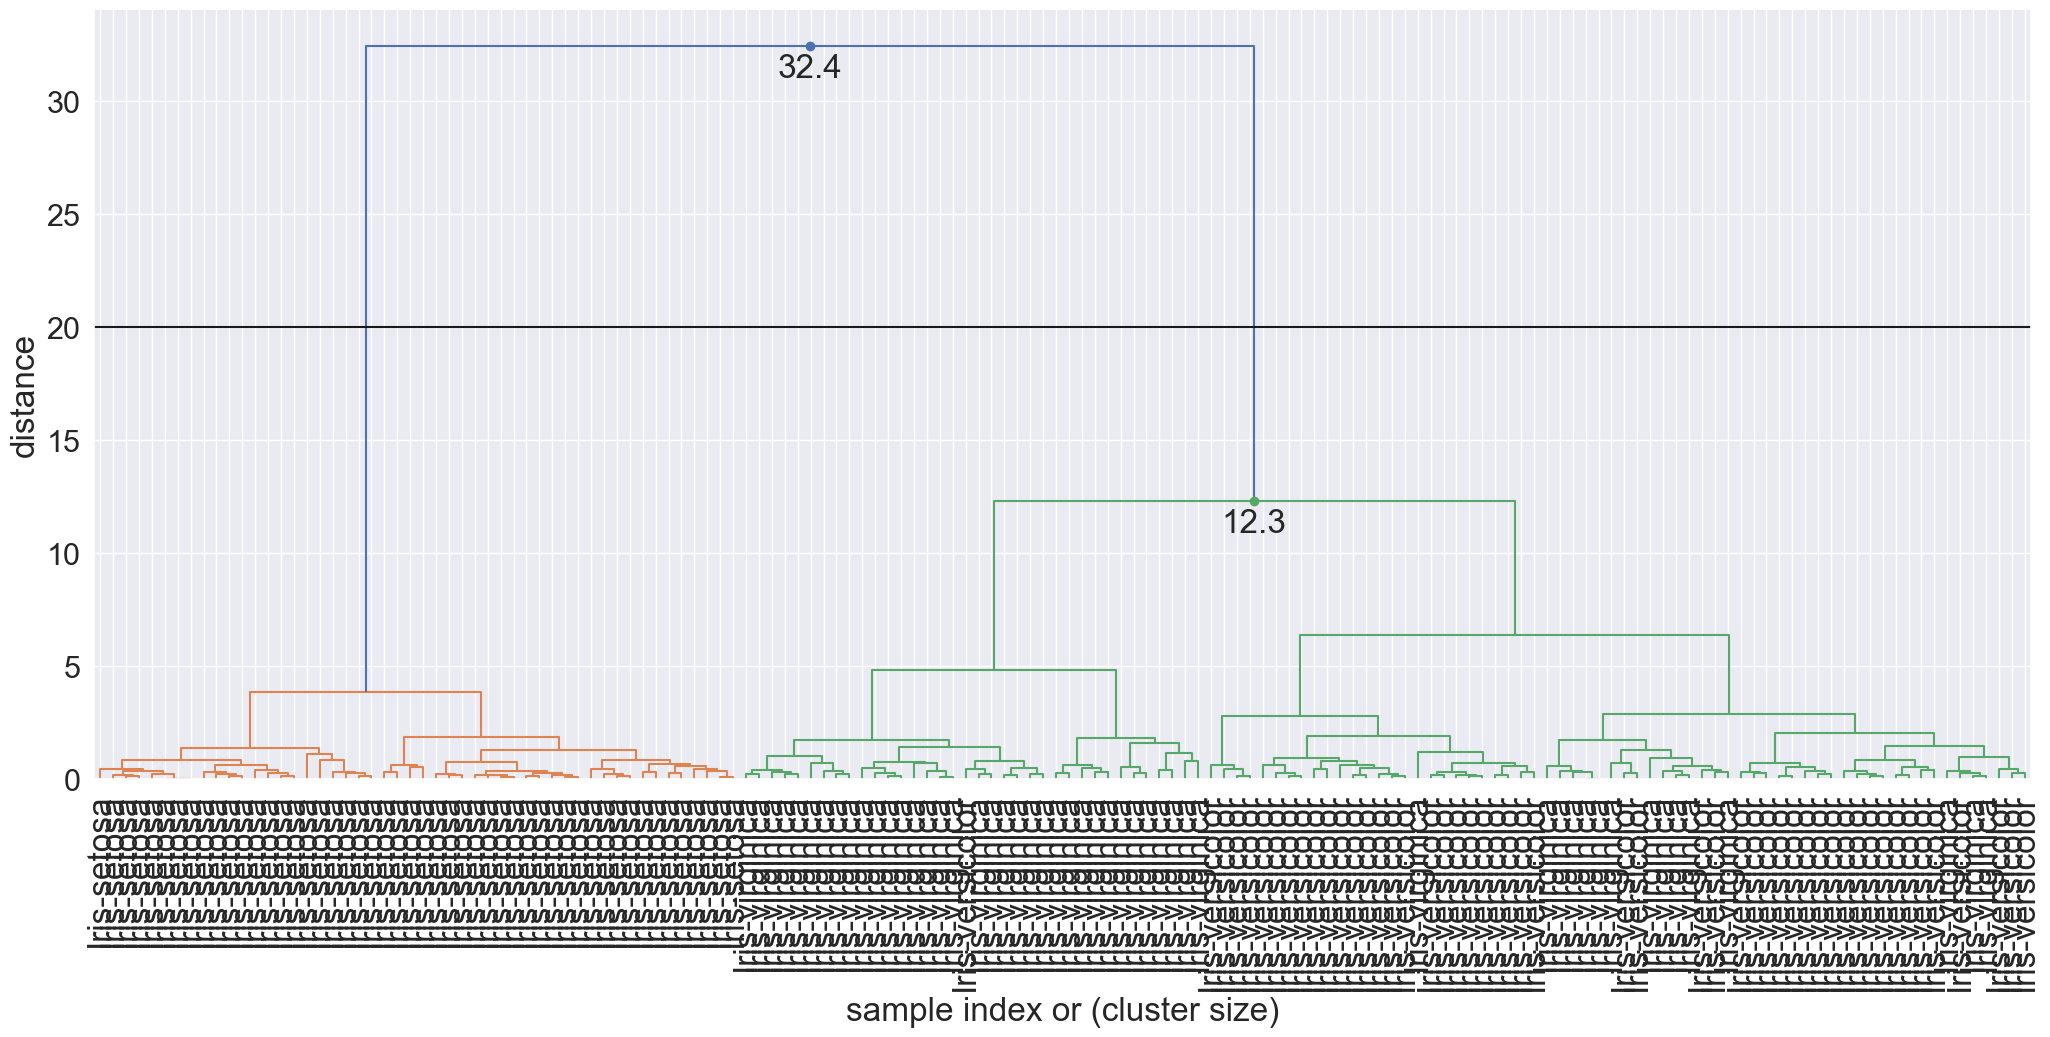

In [20]:
plt.figure(figsize=(25, 10))
sns.set(font_scale=2)
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=150,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    max_d=20,  # plot a horizontal cut-off line
    labels = donnees.Species.values,
    # titre = 'mon titre '
)
plt.show()

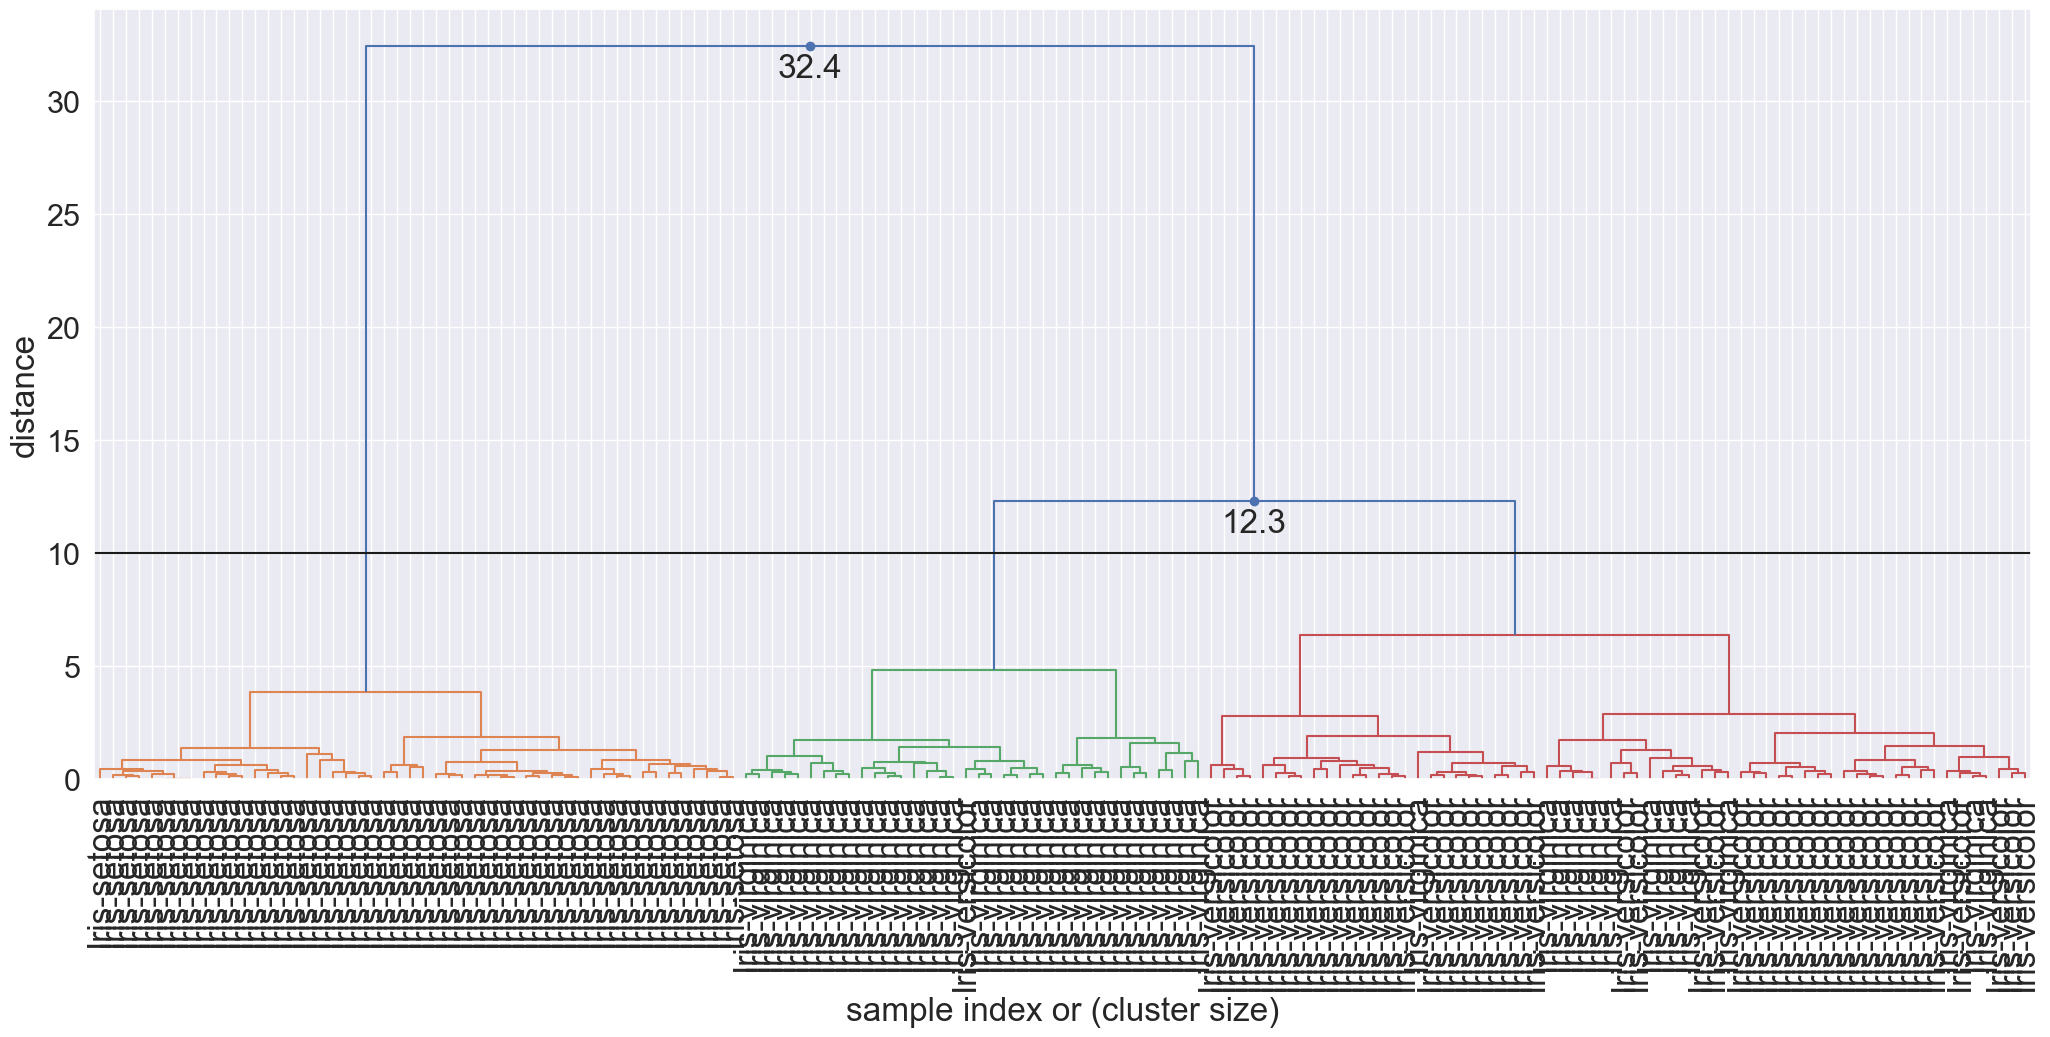

In [19]:
plt.figure(figsize=(25, 10))
sns.set(font_scale=2)
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=150,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    max_d=10,  # plot a horizontal cut-off line
    labels = donnees.Species.values,
    # titre = 'mon titre '
)
plt.show()